## Encoding categorical variable

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the preprocessed dataset
data=pd.read_csv('https://raw.githubusercontent.com/thamidu02/AIML_project/refs/heads/main/data/IT24101992.csv')

In [3]:
# converting into a pandas dataframe
data_df=pd.DataFrame(data)

In [4]:
data_df.head()

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,...,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,family_history,pet_owner,daily_supplement_dosage,target,work_sleep_balance
0,0.258065,Male,0.255070,-0.649144,-0.659878,-0.783060,-0.088073,-1.201575,0.606505,0.113628,...,High,Poor,No,High,1.0,No,Yes,-0.227479,healthy,0.077533
1,0.677419,Female,-0.508451,1.383626,1.572852,0.040388,-0.106204,-0.718725,-1.828303,0.627273,...,Moderate,Moderate,No,High,1.0,Yes,No,0.622583,healthy,-0.030493
2,-0.064516,Male,0.544123,0.533403,0.187680,0.328247,0.163743,0.090790,-1.277666,-0.397464,...,High,Good,Yes,High,0.5,No,No,0.541159,healthy,-0.237313
3,-0.516129,Female,0.156681,-0.338304,-0.358521,0.954038,1.477934,-0.522819,0.321508,1.051240,...,Low,Moderate,No,High,-1.0,No,Yes,0.837151,healthy,1.328451
4,0.387097,Female,-0.478429,-1.488155,-1.158171,-0.975776,1.605675,1.467556,0.257302,-0.189262,...,Low,Moderate,Yes,High,-1.0,Yes,Yes,0.032898,healthy,-0.437060


In [5]:
# selecting the categorical features
categorical_features=data_df.select_dtypes(include=['object']).columns.tolist()

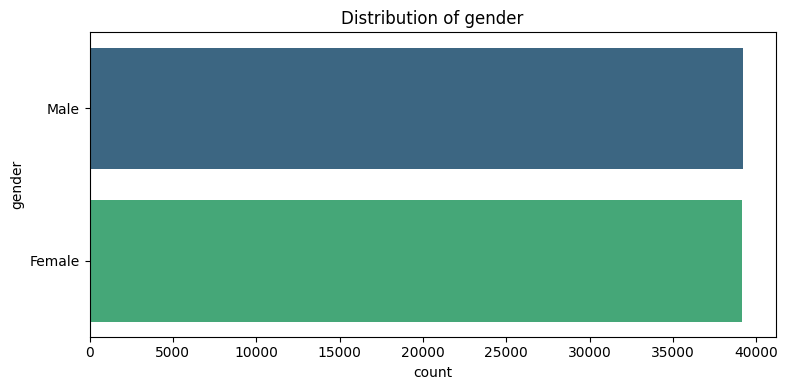

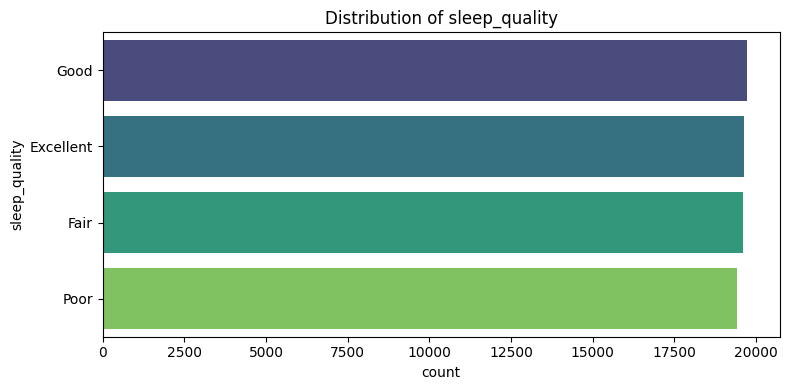

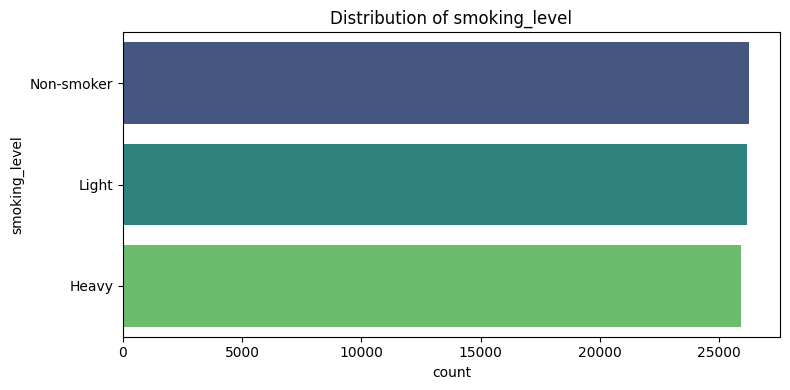

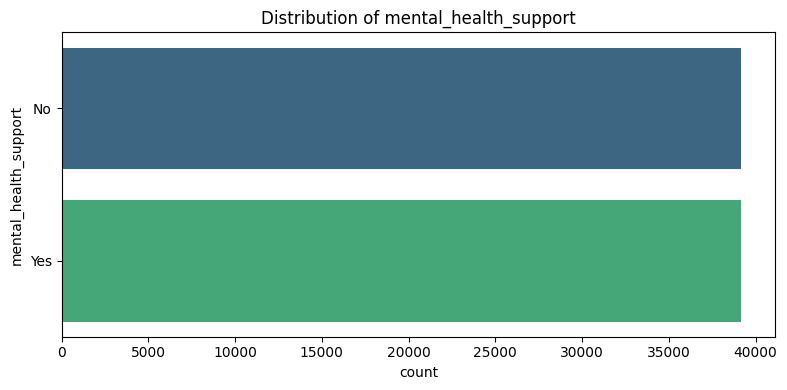

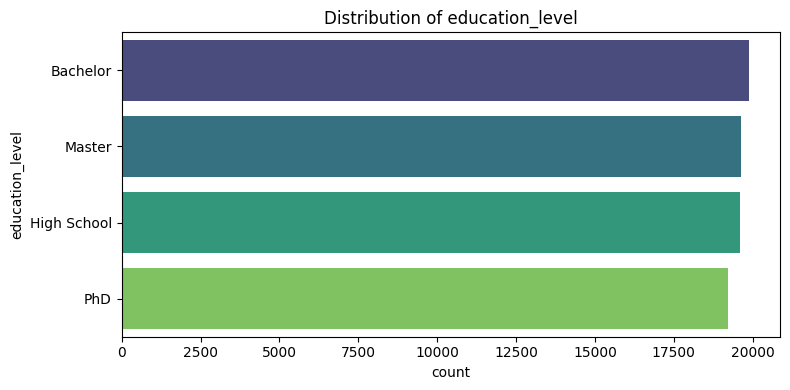

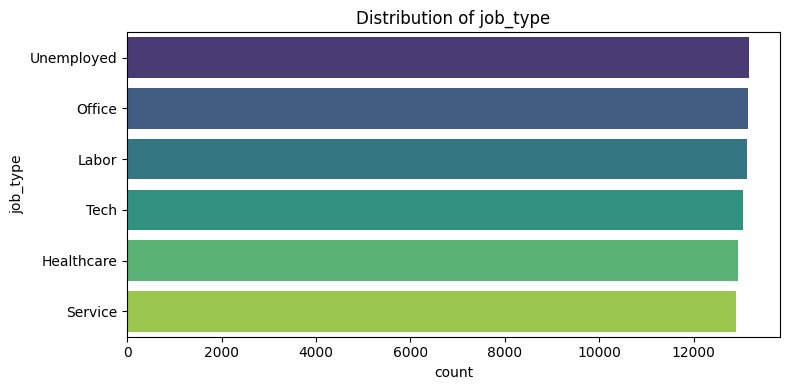

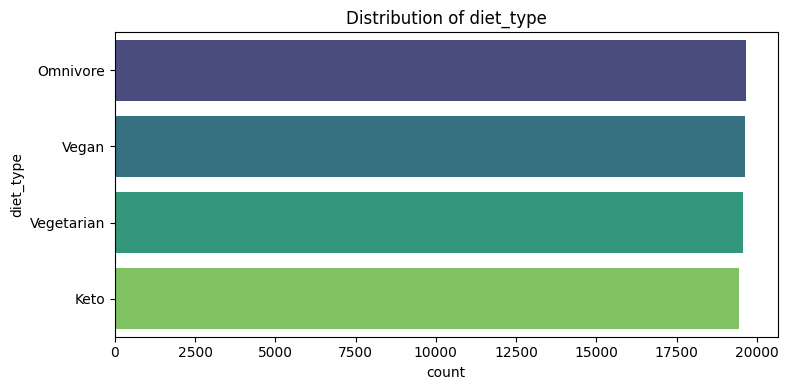

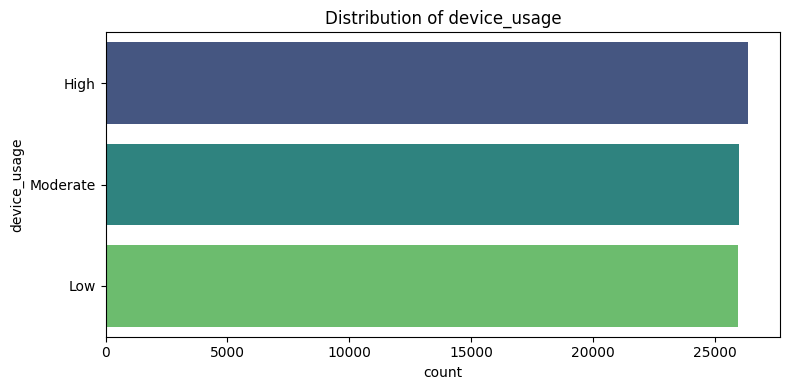

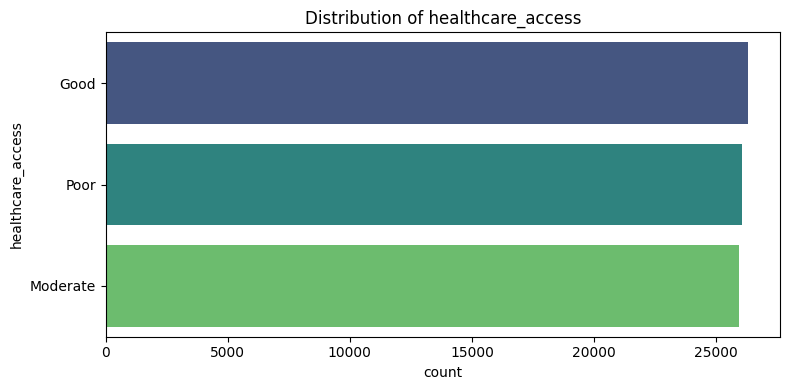

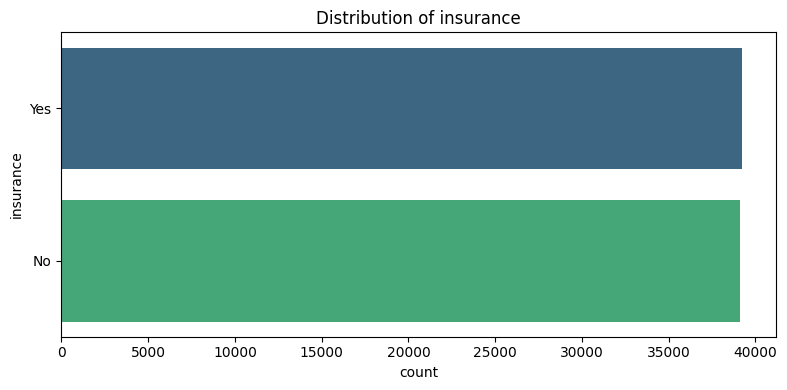

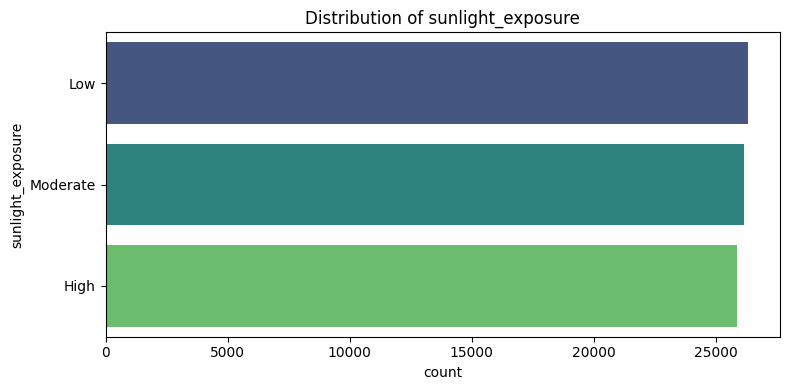

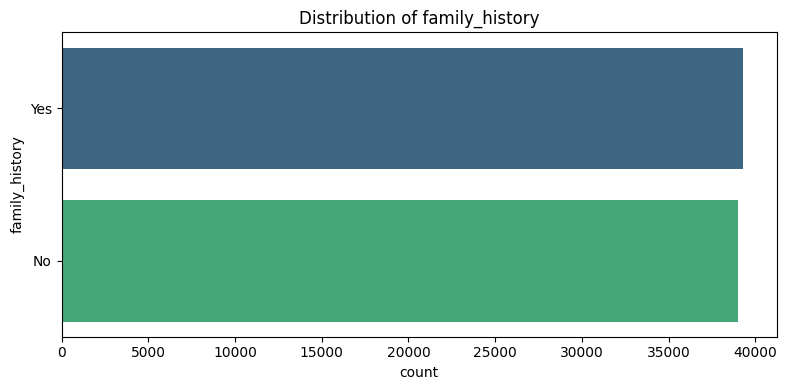

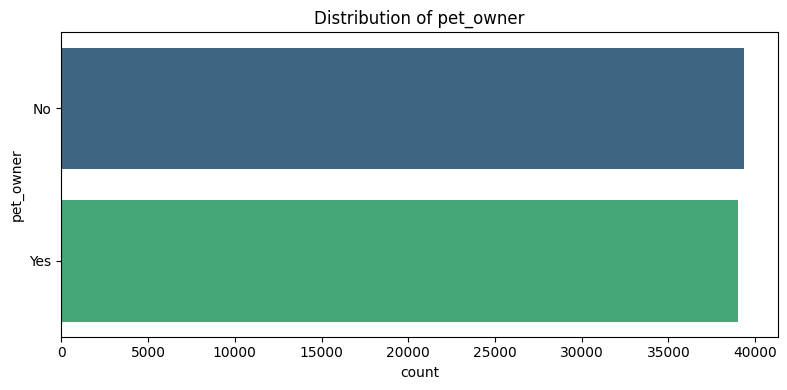

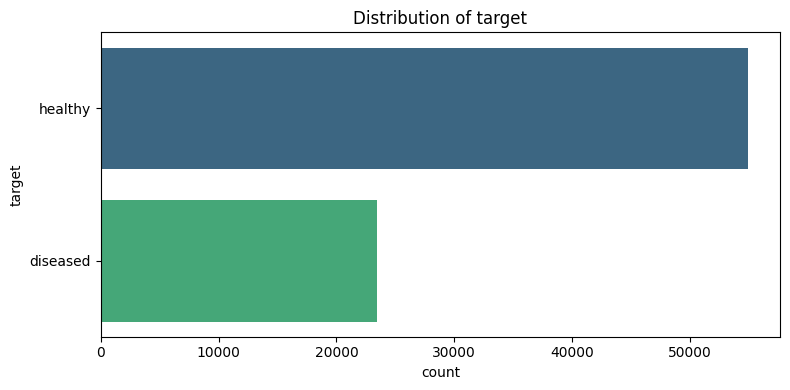

In [6]:
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=data_df, order=data_df[col].value_counts().index, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

In [ ]:
print(f"Categorical Features: \n{categorical_features}")

Categorical Features: 
['gender', 'sleep_quality', 'smoking_level', 'mental_health_support', 'education_level', 'job_type', 'diet_type', 'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure', 'family_history', 'pet_owner', 'target']


In [ ]:
# more information about categorical data
for col in categorical_features:
  print(f"\n{data_df[col].value_counts()}")


gender
Male      39206
Female    39118
Name: count, dtype: int64

sleep_quality
Good         19730
Excellent    19613
Fair         19582
Poor         19399
Name: count, dtype: int64

smoking_level
Non-smoker    26242
Light         26162
Heavy         25920
Name: count, dtype: int64

mental_health_support
No     39181
Yes    39143
Name: count, dtype: int64

education_level
Bachelor       19871
Master         19621
High School    19608
PhD            19224
Name: count, dtype: int64

job_type
Unemployed    13167
Office        13149
Labor         13125
Tech          13047
Healthcare    12932
Service       12904
Name: count, dtype: int64

diet_type
Omnivore      19665
Vegan         19635
Vegetarian    19564
Keto          19460
Name: count, dtype: int64

device_usage
High        26365
Moderate    26017
Low         25942
Name: count, dtype: int64

healthcare_access
Good        26304
Poor        26083
Moderate    25937
Name: count, dtype: int64

insurance
Yes    39205
No     39119
Name: count

now we have to choose categorical columns for encode using onehot encoding and label encoding

In [ ]:
one_hot_columns=['pet_owner','family_history','insurance','diet_type','job_type','mental_health_support','gender']
label_climns=['sunlight_exposure','healthcare_access','device_usage','education_level','smoking_level','sleep_quality']

In [ ]:
# import the RobustScaler
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder(sparse_output=False)

In [ ]:
# fit the data
onehot.fit(data_df[one_hot_columns])

OneHotEncoder(sparse_output=False)

In [ ]:
# transfrom the data
transformed_one_hot_data=onehot.transform(data_df[one_hot_columns])

In [ ]:
data_df.drop(one_hot_columns,axis=1,inplace=True)

In [ ]:
# Get feature names from onehot.categories_
onehot_feature_names = []
for i, col in enumerate(one_hot_columns):
  for cat in onehot.categories_[i]:
    onehot_feature_names.append(f'{col}_{cat}')

# Create a DataFrame from the transformed data
transformed_one_hot_df = pd.DataFrame(transformed_one_hot_data, columns=onehot_feature_names, index=data_df.index)

# Concatenate the original DataFrame and the new one-hot encoded DataFrame
data_df = pd.concat([data_df, transformed_one_hot_df], axis=1)

In [ ]:
data_df.head()

,age,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,...,job_type_Healthcare,job_type_Labor,job_type_Office,job_type_Service,job_type_Tech,job_type_Unemployed,mental_health_support_No,mental_health_support_Yes,gender_Female,gender_Male
0,0.258065,0.255070,-0.649144,-0.659878,-0.783060,-0.088073,-1.201575,0.606505,0.113628,-0.104571,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.677419,-0.508451,1.383626,1.572852,0.040388,-0.106204,-0.718725,-1.828303,0.627273,-0.833713,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.064516,0.544123,0.533403,0.187680,0.328247,0.163743,0.090790,-1.277666,-0.397464,-0.098877,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.516129,0.156681,-0.338304,-0.358521,0.954038,1.477934,-0.522819,0.321508,1.051240,0.639931,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.387097,-0.478429,-1.488155,-1.158171,-0.975776,1.605675,1.467556,0.257302,-0.189262,0.178306,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in label_climns:
    data_df[col] = label_encoder.fit_transform(data_df[col])

In [ ]:
data_df.head()

,age,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,...,job_type_Healthcare,job_type_Labor,job_type_Office,job_type_Service,job_type_Tech,job_type_Unemployed,mental_health_support_No,mental_health_support_Yes,gender_Female,gender_Male
0,0.258065,0.255070,-0.649144,-0.659878,-0.783060,-0.088073,-1.201575,0.606505,0.113628,-0.104571,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.677419,-0.508451,1.383626,1.572852,0.040388,-0.106204,-0.718725,-1.828303,0.627273,-0.833713,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.064516,0.544123,0.533403,0.187680,0.328247,0.163743,0.090790,-1.277666,-0.397464,-0.098877,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.516129,0.156681,-0.338304,-0.358521,0.954038,1.477934,-0.522819,0.321508,1.051240,0.639931,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.387097,-0.478429,-1.488155,-1.158171,-0.975776,1.605675,1.467556,0.257302,-0.189262,0.178306,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
data_df.to_csv('IT24103606.csv',index=False)

In [ ]:
from google.colab import files
files.download('IT24103606.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>